# MOVIE LENS PROJECT ANALYSIS

### 1. Prepare Problem

In [1]:
# a) Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Import the three datasets

In [2]:
movies_data = pd.read_csv('C:/data/Comcast_data/movies.dat', sep = "::", names = ['MovieID', 'Title', 'Genres'],engine='python')
ratings_data = pd.read_csv('C:/data/Comcast_data/ratings.dat', sep = "::", names = ['UserID','MovieID', 'Rating', 'Timestamp'], engine='python')
users_data = pd.read_csv('C:/data/Comcast_data/users.dat', sep = "::", names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-Code'], engine='python')

### 2. Summarize Data

In [3]:
#Summerize movie data
#View the first 5 record of dataset
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#view the description of the dataset
movies_data.describe

<bound method NDFrame.describe of       MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                            Genres  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Dram

In [5]:
#Check the shape of the dataset
movies_data.shape

(3883, 3)

In [6]:
#check the info of the dataset
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [7]:
#check the null value of the dataset
movies_data.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [8]:
#Summerize Ratings data
#View the first 5 record of dataset
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
#view the description of the dataset
ratings_data.describe

<bound method NDFrame.describe of          UserID  MovieID  Rating  Timestamp
0             1     1193       5  978300760
1             1      661       3  978302109
2             1      914       3  978301968
3             1     3408       4  978300275
4             1     2355       5  978824291
...         ...      ...     ...        ...
1000204    6040     1091       1  956716541
1000205    6040     1094       5  956704887
1000206    6040      562       5  956704746
1000207    6040     1096       4  956715648
1000208    6040     1097       4  956715569

[1000209 rows x 4 columns]>

In [10]:
#Check the shape of the dataset
ratings_data.shape

(1000209, 4)

In [11]:
#check the info of the dataset
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
#check the null value of the dataset
ratings_data.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [13]:
#Summerize Users data
#View the first 5 record of dataset
users_data.head()

,UserID,Gender,Age,Occupation,Zip-Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
#view the description of the dataset
users_data.describe

<bound method NDFrame.describe of       UserID Gender  Age  Occupation Zip-Code
0          1      F    1          10    48067
1          2      M   56          16    70072
2          3      M   25          15    55117
3          4      M   45           7    02460
4          5      M   25          20    55455
...      ...    ...  ...         ...      ...
6035    6036      F   25          15    32603
6036    6037      F   45           1    76006
6037    6038      F   56           1    14706
6038    6039      F   45           0    01060
6039    6040      M   25           6    11106

[6040 rows x 5 columns]>

In [15]:
#Check the shape of the dataset
users_data.shape

(6040, 5)

In [16]:
#check the info of the dataset
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-Code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [17]:
#check the null value of the dataset
users_data.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-Code      0
dtype: int64

### 3. Prepare Data

###### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [18]:
movie_ratings = pd.merge(movies_data, ratings_data, on = "MovieID")
display (movie_ratings.head())
display (movie_ratings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [19]:
data = pd.merge(movie_ratings, users_data, on = "UserID")
display (data.head())
display (data.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

##### Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

#### 1. User Age Distribution

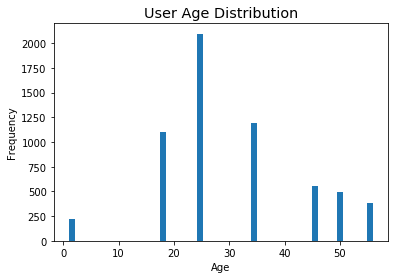

In [20]:
from matplotlib.style import use
%matplotlib inline

# Visualize age distribution of users
users_data.Age.plot.hist(bins=50)
plt.style.use('ggplot')
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.show()

#### 2. User rating of the movie “Toy Story

In [21]:
# Extract movie data for movie Toy Story
df_movie_toy_story = data[data['MovieID'] == 1]

# View toy story first five records
df_movie_toy_story.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
369,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474,F,35,1,95370


In [22]:
df_movie_toy_story['Rating'].mean()

4.146846413095811

In [23]:
data.Rating[data['MovieID'] == 1].mean()

4.146846413095811

#### 3. Top 25 movies by viewership rating

In [24]:
# Explore movie data for viewership by movie title
data_count = data['Title'].value_counts()
data_count[0:25]

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Princess

In [25]:
# Explore movie data for viewership by movie title
titlewise_mean = pd.DataFrame(data.groupby('Title')['Rating'].mean())
display (titlewise_mean.head())

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568


In [26]:
titlewise_mean.sort_values('Rating', ascending=False).head(25)
top_25 = titlewise_mean.sort_values('Rating', ascending=False).head(25)
top_25

,Rating
Title,
Ulysses (Ulisse) (1954),5.000000
Lured (1947),5.000000
Follow the Bitch (1998),5.000000
Bittersweet Motel (2000),5.000000
Song of Freedom (1936),5.000000
One Little Indian (1973),5.000000
Smashing Time (1967),5.000000
Schlafes Bruder (Brother of Sleep) (1995),5.000000
"Gate of Heavenly Peace, The (1995)",5.000000


#### 4. Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [27]:
data_of_2696 = data[data['UserID']==2696]
data_of_2696.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210


## Feature Engineering:

###### Use column genres: Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [28]:
data.Genres.head()

0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [29]:
data.Genres = data.Genres.str.split("|")
data.Genres[:3]

0              [Animation, Children's, Comedy]
1    [Animation, Children's, Musical, Romance]
2                                      [Drama]
Name: Genres, dtype: object

In [30]:
data.shape

(1000209, 10)

In [31]:
data5K = data[:5000]

In [32]:
x=[]
for rn in range(len(data5K)):
    x=x+data5K.Genres[rn]

In [33]:
unique_genres=list(set(x))
print(unique_genres)
print(len(unique_genres))

['Action', 'Comedy', 'Adventure', 'Fantasy', 'Horror', 'Documentary', 'Mystery', 'Sci-Fi', 'Thriller', 'Western', 'War', 'Crime', 'Romance', "Children's", 'Drama', 'Film-Noir', 'Animation', 'Musical']
18


### 2 Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.

In [34]:
unique_genres=pd.Series(unique_genres)

In [35]:
df=pd.DataFrame()
for row in data5K.Genres:
    a=unique_genres.isin(row)
    df=df.append(a,ignore_index=True)
df[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
df.columns=unique_genres
df.head()

,Action,Comedy,Adventure,Fantasy,Horror,Documentary,Mystery,Sci-Fi,Thriller,Western,War,Crime,Romance,Children's,Drama,Film-Noir,Animation,Musical
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
data5K.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


In [38]:
data5K=pd.concat((data5K,df),axis=1)

In [39]:
data5K.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code,...,Thriller,Western,War,Crime,Romance,Children's,Drama,Film-Noir,Animation,Musical
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
data5K = data[:5000]
data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-Code
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),"[Animation, Children's, Musical, Romance]",1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),[Drama],1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),"[Action, Adventure, Fantasy, Sci-Fi]",1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),"[Drama, War]",1,5,978824195,F,1,10,48067


#### Determine the features affecting the ratings of any particular movie.

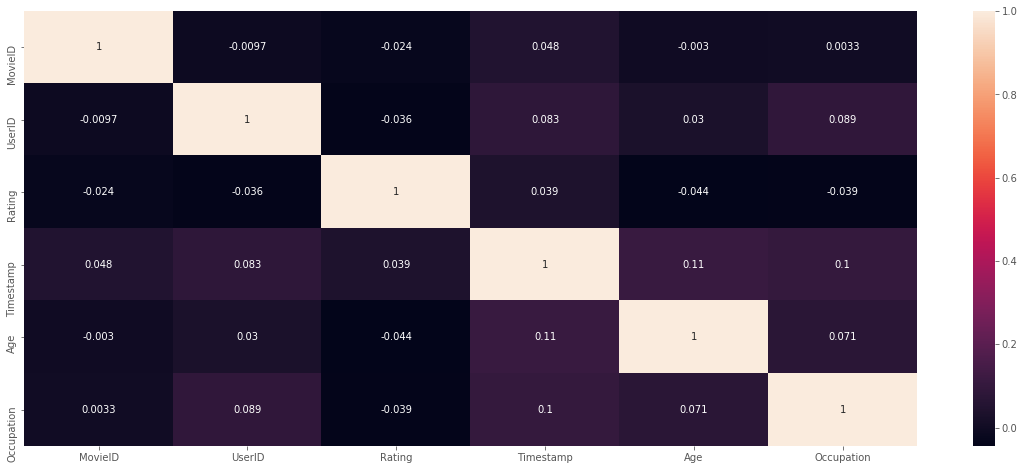

In [41]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,8))
corr=data5K.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})

### Develop an appropriate model to predict the movie ratings (using Linear & Logistic Regression)

In [42]:
# create a Python list of feature names
feature_cols = ['Age', 'Occupation']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Rating

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
from sklearn.metrics import mean_squared_error
print('mean_squared_error')
print(np.sqrt(mean_squared_error(y_test, y_pred)))

from sklearn.linear_model import LogisticRegression
logitReg = LogisticRegression()
lm = logitReg.fit(X_train, y_train)

result = logitReg.predict(X_test)
estimated = pd.Series(result, name='Estimated Values')
final_result = pd.concat([y_test, estimated], axis=1)

# Test options and evaluation metric
print (accuracy_score(y_test, result))
print (confusion_matrix(y_test, result))
print (classification_report(y_test, result))

mean_squared_error
1.1153284258531615


C:\Users\Aabha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.3506976520977553
[[    0     0     0 14151     0]
 [    0     0     0 26976     0]
 [    0     0     0 65138     0]
 [    0     0     0 87693     0]
 [    0     0     0 56095     0]]


C:\Users\Aabha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00     14151
           2       0.00      0.00      0.00     26976
           3       0.00      0.00      0.00     65138
           4       0.35      1.00      0.52     87693
           5       0.00      0.00      0.00     56095

    accuracy                           0.35    250053
   macro avg       0.07      0.20      0.10    250053
weighted avg       0.12      0.35      0.18    250053



#### Accuracy of the above matrix is 30.4 %